# Handwritten Digit Recognition using CNN (MNIST)

This notebook demonstrates how to build, train, evaluate, and use a **Convolutional Neural Network (CNN)** to recognize handwritten digits (0–9) from the **MNIST dataset**.

---

## 1. Import Required Libraries
We’ll use TensorFlow and Keras for model building, NumPy for numerical operations, and Matplotlib for visualization.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## 2. Load and Preprocess the MNIST Dataset

- The MNIST dataset contains **70,000 grayscale images** of handwritten digits.
- Each image is 28×28 pixels.
- We'll normalize pixel values (0–255 → 0–1) and reshape them for CNN input.
- Labels are one-hot encoded for categorical classification.

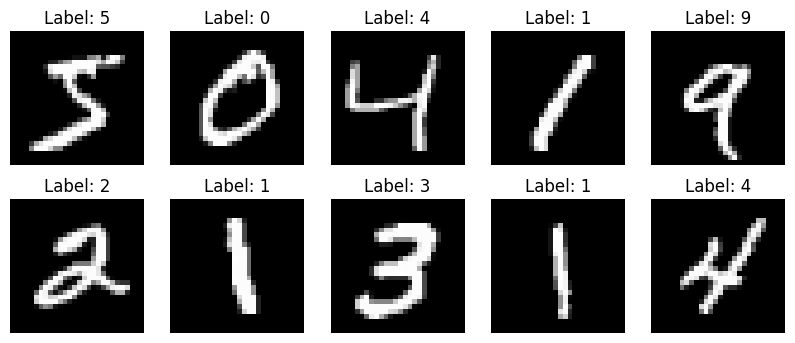

In [36]:
# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Visualize some sample digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## 3. Build the CNN Model

Our CNN architecture:
- **Conv2D (32 filters)** → **MaxPooling**
- **Conv2D (64 filters)** → **MaxPooling**
- **Flatten** the features
- **Dense (64 neurons, ReLU)** → **Output layer (10 neurons, Softmax)**

This model learns hierarchical spatial patterns of handwritten digits.

In [37]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

# Show model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

## 4. Compile and Train the Model

- Optimizer: **Adam**
- Loss: **Categorical Crossentropy**
- Metric: **Accuracy**
- Train for 5 epochs with batch size 64

In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test_cat))

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1743 - accuracy: 0.9474 - val_loss: 0.0605 - val_accuracy: 0.9804
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0385 - val_accuracy: 0.9877
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0297 - val_accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0302 - val_accuracy: 0.9902


## 5. Evaluate Model Performance

We’ll evaluate on the test dataset and plot accuracy and loss trends.

313/313 - 1s - loss: 0.0302 - accuracy: 0.9902 - 1s/epoch - 4ms/step
Test accuracy: 99.02%


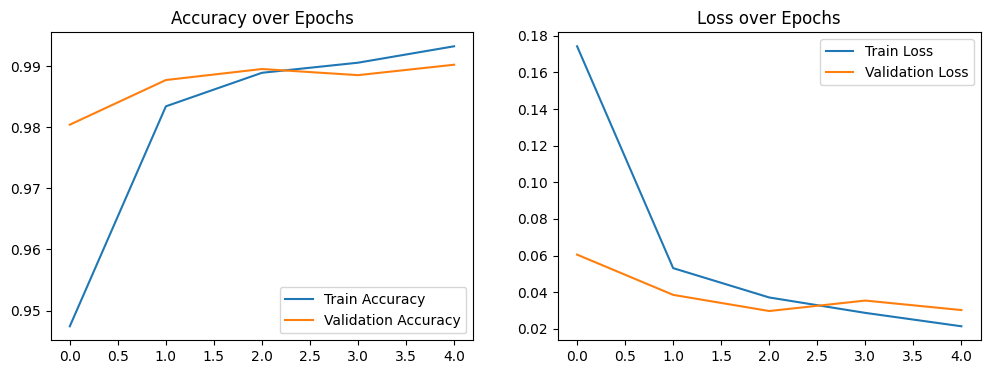

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

## 6. Visualize Predictions on Test Data

Let’s display 10 test images with their **predicted and true labels**.

313/313 [==============================] - 1s 4ms/step


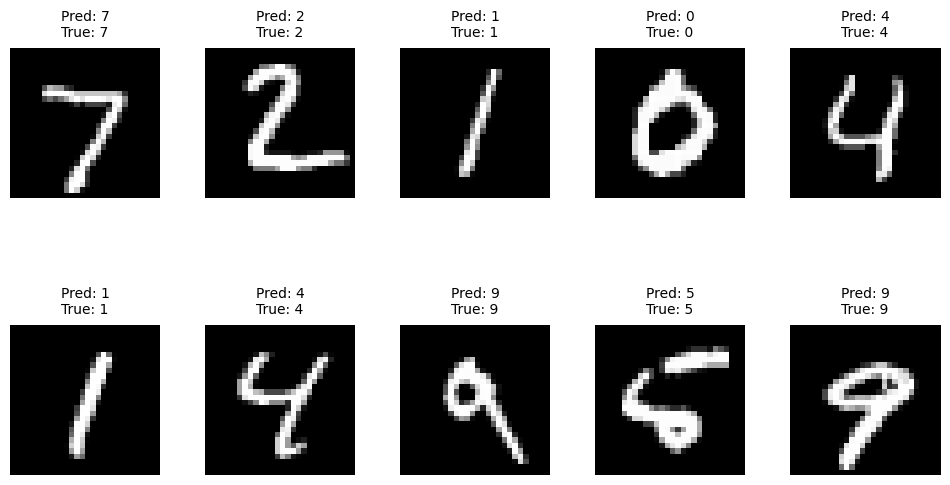

In [40]:
# Predict test images
predictions = model.predict(x_test)

# Create a figure with adjusted size and spacing
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # adds vertical/horizontal space

# Plot 10 sample predictions
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(
        f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}",
        fontsize=10, pad=8
    )
    plt.axis('off')

plt.show()

## 7. Save and Reload the Model

Save the trained CNN for later use and load it back for inference.

In [41]:
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5


## 8. Test with Custom Images

You can test the trained model with **custom handwritten digit images** stored in a `samples` folder.

The preprocessing steps include:
1. Reading and converting to grayscale  
2. Noise reduction using Gaussian blur  
3. Adaptive thresholding  
4. Extracting the digit using contours  
5. Resizing and centering to 28×28 pixels  
6. Normalizing pixel values for CNN input

In [42]:
import cv2
import os
from tensorflow.keras.models import load_model

Model loaded for testing.
Found 10 sample images: ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
1/1 [==============================] - 0s 22ms/step


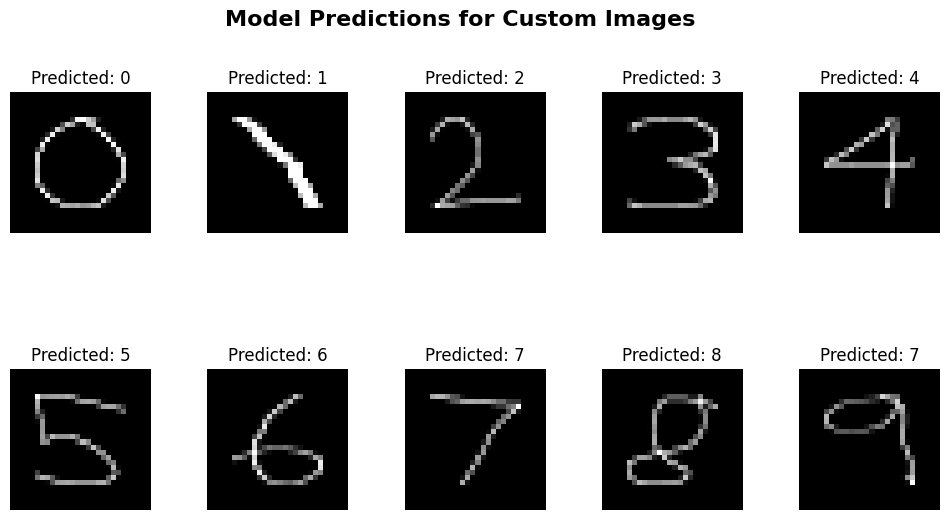

In [43]:
# Load the saved model
model = load_model('mnist_cnn_model.h5')
print("Model loaded for testing.")

# Directory containing sample test images
sample_dir = "samples"

# List available images
sample_images = [f for f in os.listdir(sample_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(sample_images)} sample images:", sample_images)

def preprocess_image(img_path):
    """Preprocess a custom image for MNIST model input."""
    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to remove small noise
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # daptive threshold to improve contrast
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3
    )

    # Find bounding box of the digit
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        img = img[y:y+h, x:x+w]

    # Resize to fit MNIST style (centered 28x28)
    img = cv2.resize(img, (18, 18), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - 18) // 2
    y_offset = (28 - 18) // 2
    canvas[y_offset:y_offset+18, x_offset:x_offset+18] = img

    # Normalize to 0–1 range
    img_normalized = canvas / 255.0

    # Reshape to match model input
    return img_normalized.reshape(1, 28, 28, 1), canvas

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.suptitle("Model Predictions for Custom Images", fontsize=16, weight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for idx, img_name in enumerate(sample_images[:10]):  # limit to first 10 images
    img_path = os.path.join(sample_dir, img_name)
    preprocessed, display_img = preprocess_image(img_path)

    # Predict
    prediction = model.predict(preprocessed)
    predicted_class = np.argmax(prediction)

    # Plot result
    plt.subplot(2, 5, idx + 1)
    plt.imshow(display_img, cmap='gray')
    plt.title(f"Predicted: {predicted_class}", fontsize=12)
    plt.axis('off')

plt.show()